# Jonas Hansen | Math 157 - Final Project Code | May 15, 2022
# Minimax Algorithm

In [20]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from functools import lru_cache
import time
from collections import Counter

In [21]:
# Loading all five-letter English words (there are 12972)
all_words1 = open("data/all_possible_guess_words.txt","r")
all_words2 = open("data/all_possible_guess_words.txt","r")

five_word_lines = all_words1.readlines()
five_word_all_lines = all_words2.readlines()

# Loading all possible Wordle solution words (there are )
wordle_words_file = open("data/wordle_words.txt")
wordle_words = wordle_words_file.readlines()

In [22]:
# Constant variables
word_len = 5
max_guesses = 10

In [23]:
def calculate_hints(guess, solution):
    '''
    Description: returns hint pattern by comparing guess word to solution words (0 = gray letter, 1 = yellow
                 letter, 2 = green letter).
    Inputs:
        guess: the guess word.
        solution: the Wordel solution word.
    Output:
        tuple(pattern): tuple of hint pattern.
    '''
    incorrect = [idx for idx, val in enumerate(guess) if val != solution[idx]]
    counts = Counter(solution[i] for i in incorrect)
    pattern = [2] * 5
    for i in incorrect:
        char = guess[i]
        if counts[char] > 0:
            pattern[i] = 1
            counts[char] -= 1
        else:
            pattern[i] = 0
            
    return tuple(pattern)

In [24]:
@lru_cache(maxsize=None)
def commonality(word1, word2):
    '''
    Description: finding letter and position pattern commonality between two words.
    Inputs:
        word1: first comparison word.
        word2: second comparison word.
    Outputs:
        comm_vec: list representing word pattern commonality.
    '''
    temp_word2 = word2
    comm_vec = [0 for i in range(word_len)]
    for idx in range(word_len):
        if word1[idx] == temp_word2[idx]:
            comm_vec[idx] = 2
            temp_word2 = temp_word2[:idx] + "*" + temp_word2[idx+1:]
    for idx in range(word_len):
        if word1[idx] in temp_word2 and comm_vec[idx] == 0:
            comm_vec[idx] = 1
            sim_idx = temp_word2.find(word1[idx])
            temp_word2 = temp_word2[:sim_idx] + "*" + temp_word2[sim_idx+1:]
    
    return comm_vec

In [25]:
def player_minimax_wordle(lines, all_lines):
    '''
    Description: allow user to play Wordle using the algorithm (i.e. user inputs hint pattern results).
    '''
    for game_round in range(max_guesses):
        min_lim = 100000
        guess_word = ""
        if game_round == 0:
            word_choices = ["salet"]
        else:
            word_choices = all_lines

        vec_sum_dict = {}
        for choice in word_choices:
            choice = choice.strip()
            temp_dict = {}
            sum_dict = {}
            for word in lines:
                word = word.strip()
                vec_comm = commonality(choice, word)
                if tuple(vec_comm) not in sum_dict:
                    sum_dict[tuple(vec_comm)] = [word]
                else:
                    sum_dict[tuple(vec_comm)].append(word)
                temp_dict[tuple([choice, word])] = vec_comm

            max_lim = max([len(val) for val in sum_dict.values()])
            if max_lim < min_lim:
                min_lim = max_lim
                guess_word = choice
                vec_sum_dict = sum_dict

        print(guess_word)
        results = input("How did it do (0 for gray, 1 for yellow, 2 for green)?:")
        hints = tuple([int(num) for num in results.split(",")])
        lines = vec_sum_dict[hints]
        if len(lines) == 1:
            print("Done. Final word is {}".format(lines[0]))
            exit(0)

    print("Failed. Did not find word after 6 attempts")

In [12]:
minimax_num_guesses_list = []
def auto_minimax_wordle(lines, all_lines, solution_word):
    '''
    Description: automatically simulate Wordle game given a Wordle solution word (automatically calculate hint
                 pattern using calculate_hints() function).
    '''
    for game_round in range(max_guesses):
        print("Round", game_round+1, "\n-----------")
        
        min_lim = 100000
        guess_word = ""
        if game_round == 0:
            word_choices = ["salet"]
        else:
            word_choices = all_lines

        vec_sum_dict = {}
        for choice in word_choices:
            choice = choice.strip()
            temp_dict = {}
            sum_dict = {}
            for word in lines:
                word = word.strip()
                vec_comm = commonality(choice, word)
                if tuple(vec_comm) not in sum_dict:
                    sum_dict[tuple(vec_comm)] = [word]
                else:
                    sum_dict[tuple(vec_comm)].append(word)
                temp_dict[tuple([choice, word])] = vec_comm

            max_lim = max([len(val) for val in sum_dict.values()])
            if max_lim < min_lim:
                min_lim = max_lim
                guess_word = choice
                vec_sum_dict = sum_dict

        print("Guess word:", guess_word)
        hints = calculate_hints(guess_word, solution_word)
        print("Hints:", hints, "\n")
        lines = vec_sum_dict[hints]
        if len(lines) == 1:
            print("--> Solution =", lines[0], "| Number of guesses =", game_round+2, "\n")
            minimax_num_guesses_list.append(int(game_round+1))
            break

In [8]:
def main():
    '''
    Description: run auto_minimax_wordle() function for all Wordle solution words
    '''
    game_num = 1
    for wordle_word in wordle_words:
        print("------------ GAME", game_num, "------------")
        auto_minimax_wordle(five_word_lines, five_word_all_lines, wordle_word)
        game_num += 1

In [ ]:
start_time = time.time()
main()
end_time = time.time()
print("\n\nRuntime =", end_time - start_time, "seconds")

------------ GAME 1 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 0) 

Round 2 
-----------
Guess word: corni
Hints: (1, 0, 0, 0, 0) 

Round 3 
-----------
Guess word: bulky
Hints: (1, 0, 0, 1, 0) 

--> Solution = aback | Number of guesses = 3 

------------ GAME 2 ------------
Round 1 
-----------
Guess word: salet
Hints: (1, 1, 0, 1, 0) 

Round 2 
-----------
Guess word: dearn
Hints: (0, 1, 2, 0, 0) 

Round 3 
-----------
Guess word: ascus
Hints: (2, 1, 0, 0, 0) 

--> Solution = abase | Number of guesses = 3 

------------ GAME 3 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 1, 1) 

Round 2 
-----------
Guess word: irate
Hints: (0, 0, 2, 2, 2) 

Round 3 
-----------
Guess word: abbot
Hints: (2, 2, 0, 0, 1) 

--> Solution = abate | Number of guesses = 3 

------------ GAME 4 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 2, 0) 

Round 2 
-----------
Guess word: nidor
Hints: (0, 0, 0, 0, 0) 

Round 3 
-----------
Gu

Guess word: orcin
Hints: (1, 0, 0, 0, 0) 

Round 3 
-----------
Guess word: ablow
Hints: (2, 0, 0, 2, 0) 

--> Solution = afoot | Number of guesses = 3 

------------ GAME 32 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 1, 0, 0) 

Round 2 
-----------
Guess word: braai
Hints: (0, 0, 1, 0, 0) 

Round 3 
-----------
Guess word: afoul
Hints: (2, 2, 2, 2, 2) 

--> Solution = afoul | Number of guesses = 3 

------------ GAME 33 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 2, 1) 

Round 2 
-----------
Guess word: apron
Hints: (2, 0, 1, 0, 0) 

--> Solution = after | Number of guesses = 2 

------------ GAME 34 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 0) 

Round 2 
-----------
Guess word: corni
Hints: (0, 0, 0, 1, 1) 

Round 3 
-----------
Guess word: kinin
Hints: (0, 0, 0, 2, 2) 

Round 4 
-----------
Guess word: abamp
Hints: (2, 0, 2, 0, 0) 

--> Solution = again | Number of guesses = 4 

------------ GAME 35 ------

Guess word: braai
Hints: (0, 0, 1, 0, 0) 

Round 3 
-----------
Guess word: afoul
Hints: (2, 0, 2, 0, 1) 

Round 4 
-----------
Guess word: aahed
Hints: (2, 0, 0, 0, 0) 

--> Solution = along | Number of guesses = 4 

------------ GAME 63 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 1, 0, 0) 

Round 2 
-----------
Guess word: braai
Hints: (0, 0, 1, 0, 0) 

Round 3 
-----------
Guess word: afoul
Hints: (2, 1, 2, 0, 1) 

--> Solution = aloof | Number of guesses = 3 

------------ GAME 64 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 1, 0, 0) 

Round 2 
-----------
Guess word: braai
Hints: (0, 0, 1, 0, 0) 

Round 3 
-----------
Guess word: afoul
Hints: (2, 0, 2, 2, 1) 

--> Solution = aloud | Number of guesses = 3 

------------ GAME 65 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 1, 0, 0) 

Round 2 
-----------
Guess word: braai
Hints: (0, 0, 1, 1, 0) 

Round 3 
-----------
Guess word: abhor
Hints: (2, 0, 1, 0, 0) 

--> Soluti

Guess word: braai
Hints: (0, 0, 1, 0, 1) 

Round 3 
-----------
Guess word: acorn
Hints: (2, 0, 0, 0, 1) 

--> Solution = anvil | Number of guesses = 3 

------------ GAME 92 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 1) 

Round 2 
-----------
Guess word: noria
Hints: (0, 2, 2, 0, 2) 

Round 3 
-----------
Guess word: abamp
Hints: (2, 0, 1, 0, 0) 

--> Solution = aorta | Number of guesses = 3 

------------ GAME 93 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 2) 

Round 2 
-----------
Guess word: orcin
Hints: (0, 1, 0, 0, 0) 

Round 3 
-----------
Guess word: aquae
Hints: (2, 0, 0, 1, 0) 

--> Solution = apart | Number of guesses = 3 

------------ GAME 94 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 0) 

Round 2 
-----------
Guess word: corni
Hints: (0, 0, 0, 0, 1) 

Round 3 
-----------
Guess word: bivia
Hints: (0, 0, 0, 2, 1) 

Round 4 
-----------
Guess word: aahed
Hints: (2, 0, 2, 0, 2) 

--> Soluti

Guess word: irate
Hints: (0, 0, 1, 1, 2) 

Round 3 
-----------
Guess word: acton
Hints: (2, 0, 1, 1, 1) 

--> Solution = atone | Number of guesses = 3 

------------ GAME 121 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 1) 

Round 2 
-----------
Guess word: noria
Hints: (0, 0, 0, 2, 1) 

Round 3 
-----------
Guess word: aahed
Hints: (2, 0, 0, 0, 0) 

--> Solution = attic | Number of guesses = 3 

------------ GAME 122 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 0) 

Round 2 
-----------
Guess word: corni
Hints: (0, 1, 0, 0, 1) 

Round 3 
-----------
Guess word: almud
Hints: (2, 0, 0, 1, 1) 

--> Solution = audio | Number of guesses = 3 

------------ GAME 123 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 0, 0, 2) 

Round 2 
-----------
Guess word: orcin
Hints: (0, 0, 0, 2, 0) 

Round 3 
-----------
Guess word: abamp
Hints: (2, 0, 0, 0, 0) 

--> Solution = audit | Number of guesses = 3 

------------ GAME 124 --

Guess word: chaya
Hints: (0, 0, 1, 1, 0) 

Round 3 
-----------
Guess word: awdls
Hints: (1, 0, 0, 1, 0) 

Round 4 
-----------
Guess word: abamp
Hints: (1, 1, 0, 2, 0) 

--> Solution = balmy | Number of guesses = 4 

------------ GAME 149 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 2, 1, 0, 0) 

Round 2 
-----------
Guess word: lunar
Hints: (1, 0, 2, 2, 0) 

Round 3 
-----------
Guess word: abaca
Hints: (1, 1, 1, 0, 0) 

--> Solution = banal | Number of guesses = 3 

------------ GAME 150 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 2, 0, 0, 0) 

Round 2 
-----------
Guess word: irony
Hints: (0, 0, 1, 1, 0) 

Round 3 
-----------
Guess word: cajon
Hints: (0, 2, 1, 1, 1) 

--> Solution = banjo | Number of guesses = 3 

------------ GAME 151 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 2, 0, 1, 0) 

Round 2 
-----------
Guess word: garni
Hints: (1, 2, 2, 0, 0) 

Round 3 
-----------
Guess word: abamp
Hints: (1, 1, 0, 0, 0) 

--> Sol

Guess word: irone
Hints: (0, 0, 0, 1, 1) 

Round 3 
-----------
Guess word: baddy
Hints: (2, 0, 0, 0, 0) 

Round 4 
-----------
Guess word: aahed
Hints: (0, 0, 0, 1, 0) 

--> Solution = begun | Number of guesses = 4 

------------ GAME 177 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 0, 0, 1, 0) 

Round 2 
-----------
Guess word: irone
Hints: (1, 0, 0, 2, 1) 

Round 3 
-----------
Guess word: geeky
Hints: (1, 2, 0, 0, 0) 

--> Solution = being | Number of guesses = 3 

------------ GAME 178 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 0, 2, 1, 0) 

Round 2 
-----------
Guess word: coble
Hints: (1, 0, 1, 1, 1) 

--> Solution = belch | Number of guesses = 2 

------------ GAME 179 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 0, 2, 1, 0) 

Round 2 
-----------
Guess word: coble
Hints: (0, 0, 1, 1, 2) 

Round 3 
-----------
Guess word: aalii
Hints: (0, 0, 2, 2, 0) 

--> Solution = belie | Number of guesses = 3 

------------ GAME 180 --

Guess word: alarm
Hints: (0, 2, 2, 0, 1) 

Round 3 
-----------
Guess word: abaca
Hints: (0, 1, 2, 0, 0) 

--> Solution = blame | Number of guesses = 3 

------------ GAME 207 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 1, 0, 0) 

Round 2 
-----------
Guess word: braai
Hints: (2, 0, 2, 0, 0) 

Round 3 
-----------
Guess word: adunc
Hints: (1, 1, 0, 2, 0) 

--> Solution = bland | Number of guesses = 3 

------------ GAME 208 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 1, 0, 0) 

Round 2 
-----------
Guess word: braai
Hints: (2, 0, 2, 0, 0) 

Round 3 
-----------
Guess word: adunc
Hints: (1, 0, 0, 2, 0) 

--> Solution = blank | Number of guesses = 3 

------------ GAME 209 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 1, 1, 1, 0) 

Round 2 
-----------
Guess word: alarm
Hints: (0, 2, 2, 2, 0) 

Round 3 
-----------
Guess word: abaft
Hints: (0, 1, 2, 0, 0) 

--> Solution = blare | Number of guesses = 3 

------------ GAME 210 --

Guess word: award
Hints: (0, 0, 2, 2, 2) 

Round 4 
-----------
Guess word: aahed
Hints: (1, 0, 0, 0, 2) 

--> Solution = board | Number of guesses = 4 

------------ GAME 237 ------------
Round 1 
-----------
Guess word: salet
Hints: (1, 1, 0, 0, 2) 

Round 2 
-----------
Guess word: aroba
Hints: (1, 0, 1, 1, 0) 

--> Solution = boast | Number of guesses = 2 

------------ GAME 238 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 0, 0, 0, 0) 

Round 2 
-----------
Guess word: irony
Hints: (0, 0, 1, 0, 2) 

Round 3 
-----------
Guess word: bedim
Hints: (2, 0, 0, 0, 0) 

Round 4 
-----------
Guess word: agape
Hints: (0, 0, 0, 0, 0) 

--> Solution = bobby | Number of guesses = 4 

------------ GAME 239 ------------
Round 1 
-----------
Guess word: salet
Hints: (0, 0, 0, 2, 0) 

Round 2 
-----------
Guess word: doric
Hints: (0, 2, 0, 0, 0) 

Round 3 
-----------
Guess word: gunky
Hints: (0, 0, 2, 0, 2) 

Round 4 
-----------
Guess word: abamp
Hints: (0, 1, 0, 0, 0) 

--> Sol

In [ ]:
minimax_num_guesses_list

## Results

In [51]:
# runtimes = [183.06268000602722, 198.2684919834137, 185.35588216781616, 179.83423829078674, 178.24608898162842,
#           174.83819603919983, 176.83255195617676]

# salet_dist = [4]*1087 + [3]*894 + [5]*69 + [2]*29 + [6]*2
# soare_dist = [4]*1130 + [3]*827 + [5]*92 + [6]*6 + [2]*26
# adieu_dist = [4]*1273 + [3]*641 + [2]*12 + [5]*151 + [6]*4
# arise_dist = [3]*812 + [4]*1151 + [2]*22 + [5]*94 + [6]*2
# crane_dist = [3]*912 + [4]*1056 + [5]*88 + [2]*25
# tares_dist = [4]*1030 + [3]*945 + [2]*33 + [5]*73
# bares_dist = [3]*784 + [2]*27 + [4]*1189 + [5]*79 + [6]*2

runtimes = [203.30022978782654, 234.47106194496155, 213.4443428516388, 210.37180614471436, 219.41270804405212,
            195.60411286354065, 197.18342900276184]

salet_dist = [3]*912 + [4]*1279 + [5]*80 + [2]*34 + [6]*4
soare_dist = [4]*1292 + [3]*894 + [5]*99 + [2]*22 + [6]*2
adieu_dist = [4]*1487 + [3]*632 + [2]*16 + [5]*174
arise_dist = [3]*858 + [4]*1312 + [2]*26 + [5]*110 + [6]*3
crane_dist = [3]*928 + [4]*1265 + [5]*84 + [2]*30 + [6]*2
tares_dist = [4]*1310 + [3]*878 + [5]*95 + [2]*26
stare_dist = [4]*1260 + [3]*923 + [5]*101 + [2]*23 + [6]*2

In [52]:
salet_mean = np.mean(salet_dist)
soare_mean = np.mean(soare_dist)
adieu_mean = np.mean(adieu_dist)
arise_mean = np.mean(arise_dist)
crane_mean = np.mean(crane_dist)
tares_mean = np.mean(tares_dist)
stare_mean = np.mean(stare_dist)

In [54]:
print("Opener: 'salet' | Mean Number of Guesses:", salet_mean)
print("Opener: 'soare' | Mean Number of Guesses:", soare_mean)
print("Opener: 'adieu' | Mean Number of Guesses:", adieu_mean)
print("Opener: 'arise' | Mean Number of Guesses:", arise_mean)
print("Opener: 'crane' | Mean Number of Guesses:", crane_mean)
print("Opener: 'tares' | Mean Number of Guesses:", tares_mean)
print("Opener: 'stare' | Mean Number of Guesses:", stare_mean)

Opener: 'salet' | Mean Number of Guesses: 3.613685578172369
Opener: 'soare' | Mean Number of Guesses: 3.638371589432655
Opener: 'adieu' | Mean Number of Guesses: 3.787786920744911
Opener: 'arise' | Mean Number of Guesses: 3.656128194023387
Opener: 'crane' | Mean Number of Guesses: 3.610220874837592
Opener: 'tares' | Mean Number of Guesses: 3.638371589432655
Opener: 'stare' | Mean Number of Guesses: 3.6258120398440883


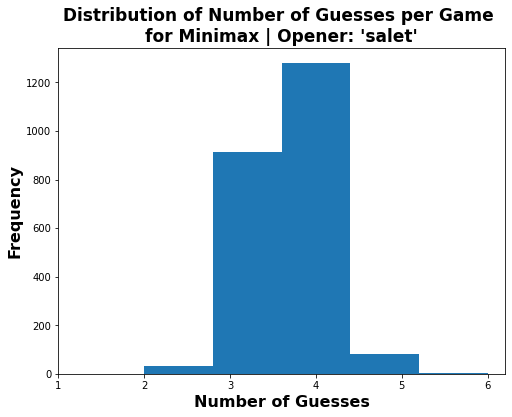

In [56]:
fig = plt.figure(figsize=(8,6))

plt.hist(salet_dist, 5)
plt.title("Distribution of Number of Guesses per Game \nfor Minimax | Opener: 'salet'", fontsize=17, fontweight="bold")
plt.xticks(np.arange(1,7))
plt.xlabel("Number of Guesses", fontsize=16, fontweight="bold")
plt.ylabel("Frequency", fontsize=16, fontweight="bold")
plt.show()

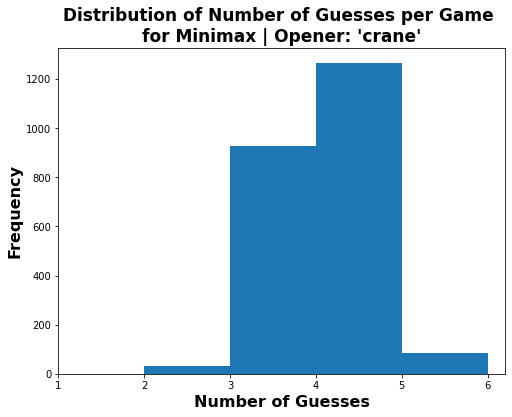

In [57]:
fig = plt.figure(figsize=(8,6))

plt.hist(crane_dist, 4)
plt.title("Distribution of Number of Guesses per Game \nfor Minimax | Opener: 'crane'", fontsize=17, fontweight="bold")
plt.xticks(np.arange(1,7))
plt.xlabel("Number of Guesses", fontsize=16, fontweight="bold")
plt.ylabel("Frequency", fontsize=16, fontweight="bold")
plt.show()

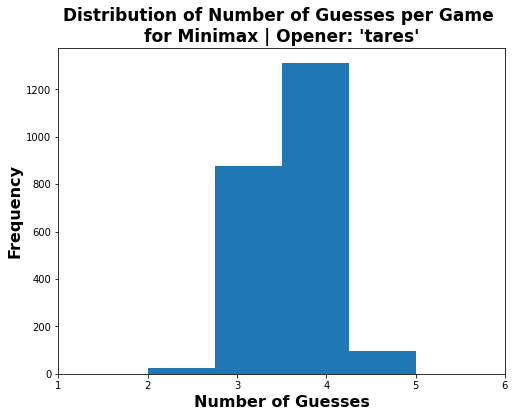

In [58]:
fig = plt.figure(figsize=(8,6))

plt.hist(tares_dist, 4)
plt.title("Distribution of Number of Guesses per Game \nfor Minimax | Opener: 'tares'", fontsize=17, fontweight="bold")
plt.xticks(np.arange(1,7))
plt.xlabel("Number of Guesses", fontsize=16, fontweight="bold")
plt.ylabel("Frequency", fontsize=16, fontweight="bold")
plt.show()

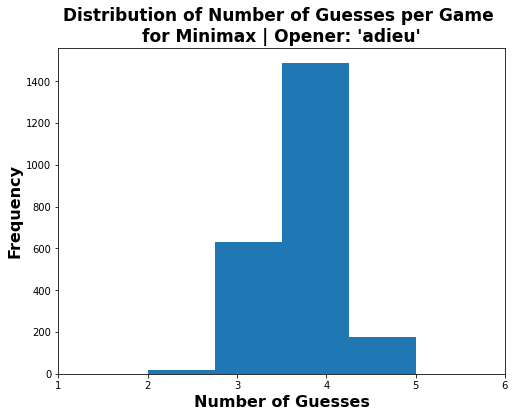

In [60]:
fig = plt.figure(figsize=(8,6))

plt.hist(adieu_dist, 4)
plt.title("Distribution of Number of Guesses per Game \nfor Minimax | Opener: 'adieu'", fontsize=17, fontweight="bold")
plt.xticks(np.arange(1,7))
plt.xlabel("Number of Guesses", fontsize=16, fontweight="bold")
plt.ylabel("Frequency", fontsize=16, fontweight="bold")
plt.show()